In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Read data

In [51]:
from sqlalchemy import create_engine
import pandas as pd

path = "../Data/wjazzd.db"
engine = create_engine(f"sqlite:///{path}")

melody = pd.read_sql("melody", engine)
beats = pd.read_sql("beats", engine)

## Create .csv files of the data

In [3]:
df_melody = pd.DataFrame(melody)
df_melody.info()

df_beats = pd.DataFrame(beats)
df_beats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200809 entries, 0 to 200808
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      200809 non-null  int64  
 1   melid        200809 non-null  int64  
 2   onset        200809 non-null  float64
 3   pitch        200809 non-null  float64
 4   duration     200809 non-null  float64
 5   period       200809 non-null  int64  
 6   division     200809 non-null  int64  
 7   bar          200809 non-null  int64  
 8   beat         200809 non-null  int64  
 9   tatum        200809 non-null  int64  
 10  subtatum     200809 non-null  int64  
 11  num          200809 non-null  int64  
 12  denom        200809 non-null  int64  
 13  beatprops    200809 non-null  object 
 14  beatdur      200809 non-null  float64
 15  tatumprops   200809 non-null  object 
 16  f0_mod       200809 non-null  object 
 17  loud_max     180195 non-null  float64
 18  loud_med     200320 non-

## Plot data


	######################################################
	####################    Melody    ####################
	######################################################

(200809, 26)


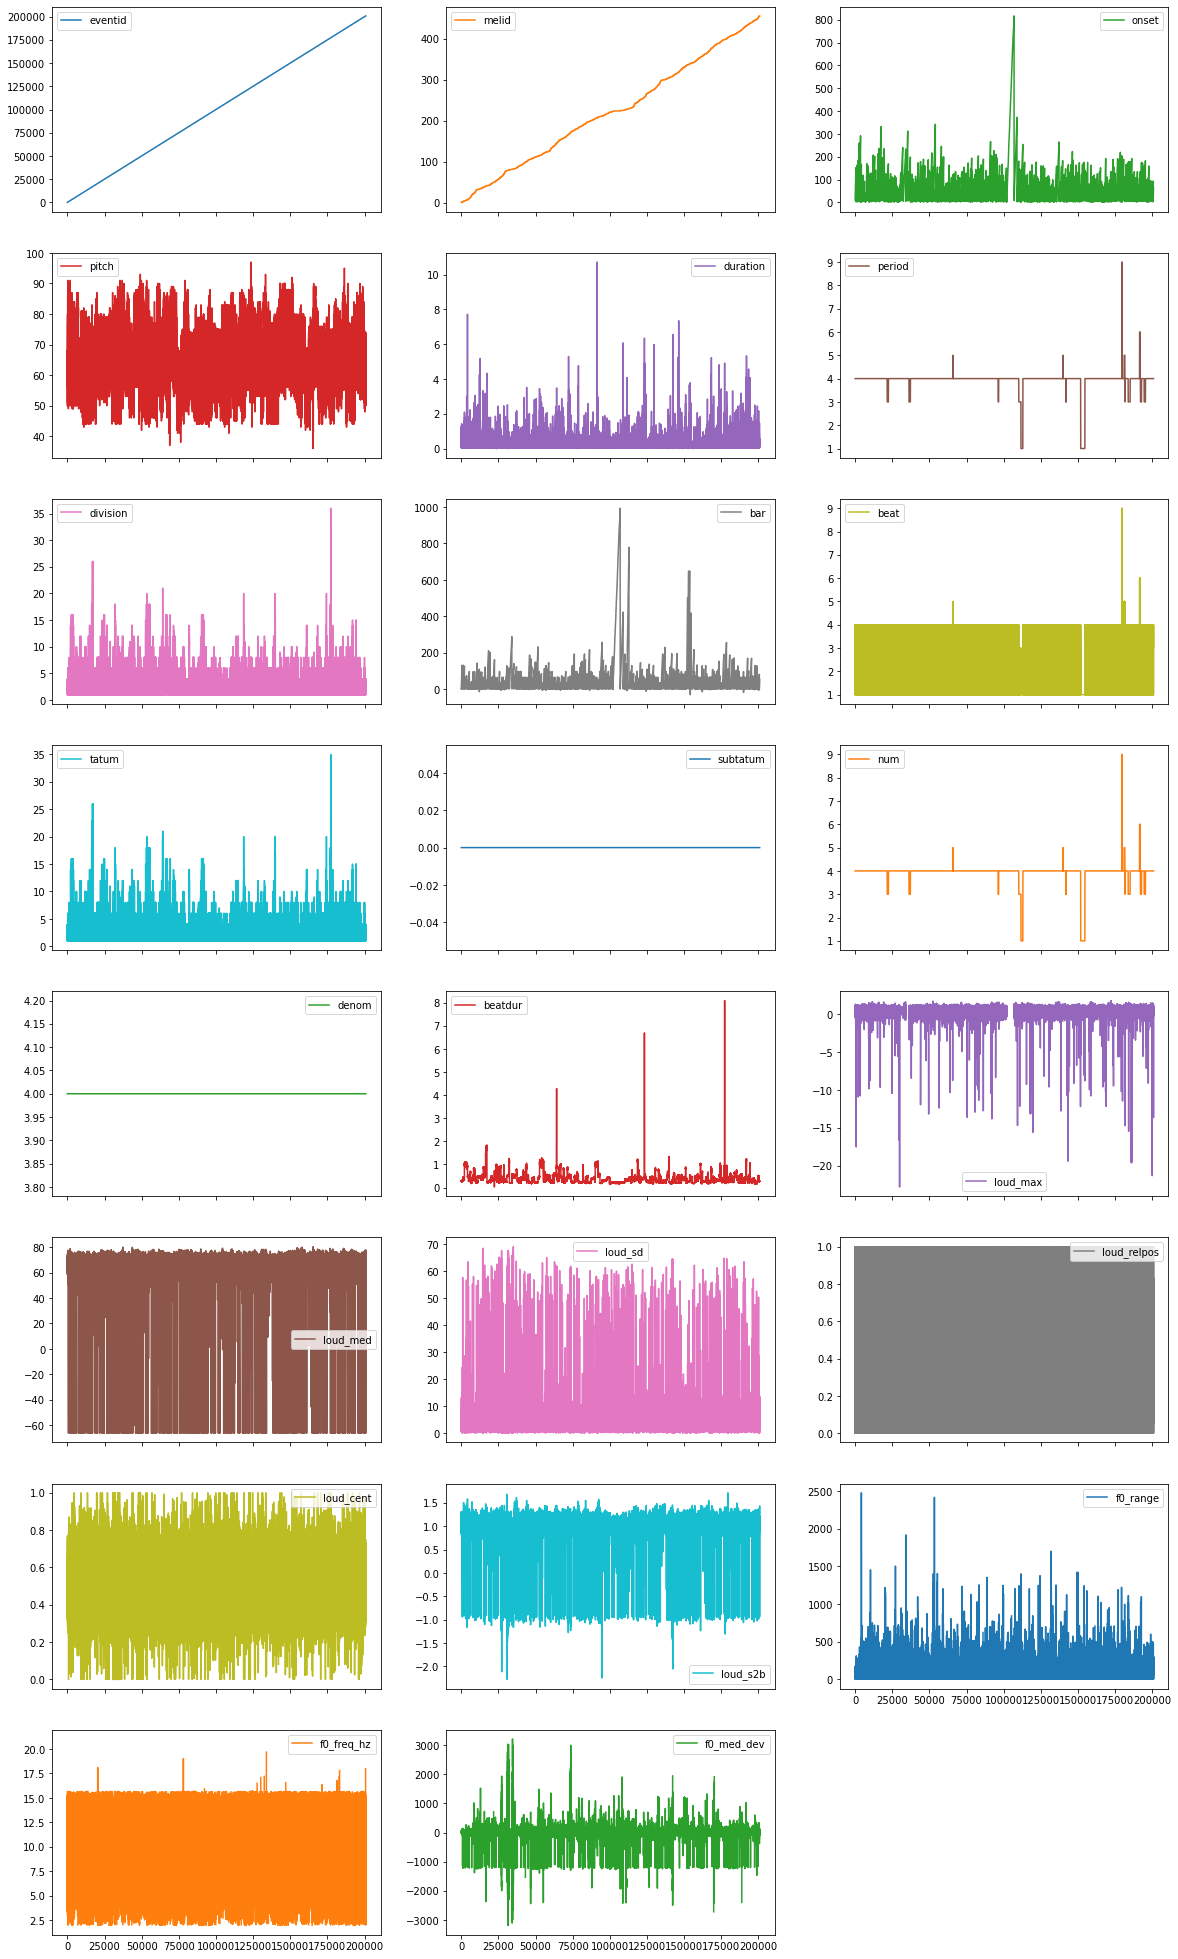


	#######################################################
	#####################    Beats    #####################
	#######################################################

(132329, 10)


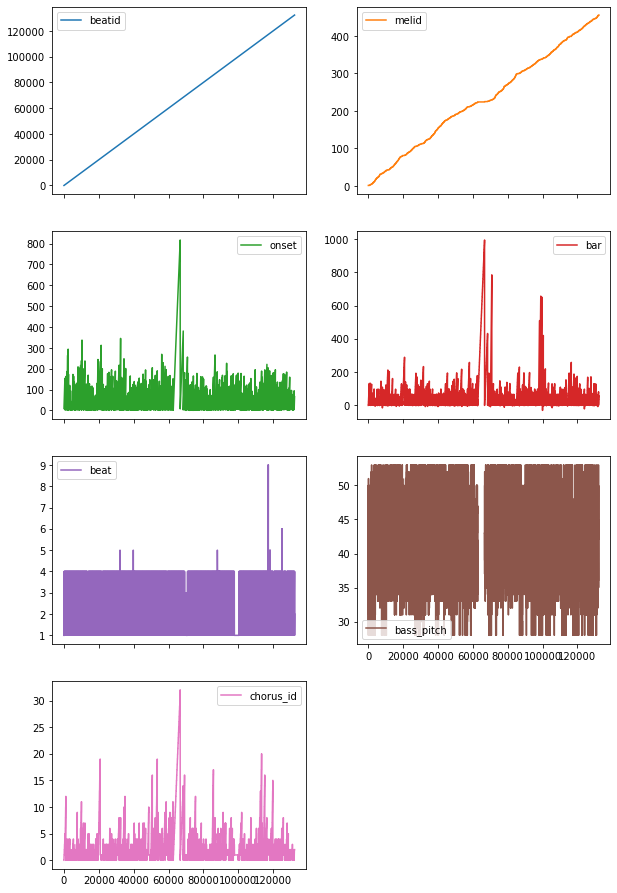

In [4]:
print("\n\t######################################################")
print("\t####################    Melody    ####################")
print("\t######################################################\n")

print(melody.shape)
df_melody.plot(subplots=True, layout=(9, 3), figsize=(20,40))
plt.show()
# Not displayed columns that contain Text:
# - beatdrops
# - tatumprops
# - f0_mod


print("\n\t#######################################################")
print("\t#####################    Beats    #####################")
print("\t#######################################################\n")

print(beats.shape)
df_beats.plot(subplots=True, layout=(5, 2), figsize=(10,20))
plt.show()
# Not displayed columns that contain Text:
# - signature
# - chord
# - form

## Data analysis

3 Columns in melody and beats contain strings:
- beatdrops (melody)
- tatumprops (melody)
- f0_mod (melody)
- signature (beats)
- chord (beats)
- form (beats)


3 columns in melody contain only a single value and can be removed:
- Subtatum
- denom
- beatprops

9 columns in melody contain NaN values:
- loud_max      : 20614
- loud_med      : 489
- loud_sd       : 489
- loud_relpos   : 489
- loud_cent     : 1661
- loud_s2b      : 489
- f0_range      : 4133
- f0_freq_hz    : 124902
- f0_med_dev    : 4133

1 column in beats contain NaN values:
- bass_pitch    : 9789


In [5]:
print("\n\t######################################################")
print("\t####################    Melody    ####################")
print("\t######################################################\n")


for col in df_melody:
    print("\n", col)
    print(df_melody[col].unique())
    print("Number of NaNs: %d" % df_melody[col].isna().sum())

print("\n\t#######################################################")
print("\t#####################    Beats    #####################")
print("\t#######################################################\n")

print("\nRows containing a chord entry: %d from %d entries" % ((df_beats.chord != '').sum(), df_beats.shape[0]))

for col in df_beats:
    print("\n", col)
    print(df_beats[col].unique(), end='\n')
    print("Number of NaNs: %d" % df_beats[col].isna().sum())




	######################################################
	####################    Melody    ####################
	######################################################


 eventid
[     1      2      3 ... 200807 200808 200809]
Number of NaNs: 0

 melid
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184

## Test scripts

In [54]:
import sys
sys.path.append('../Data/')

from chord_encoding import get_dataset_multi_hot, get_dataset2

In [7]:
beats_encoded, vocab_sizes, target_size = get_dataset2(beats)

../Data\chord_encoding.py:136: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  beats['chord_info'] = beats['chord_info'].str.replace('+','')
../Data\chord_encoding.py:143: FutureWarning: The default value of regex will change from True to False in a future version.
  beats['chord_info'] = beats['chord_info'].str.replace('\/(.*)','')



Using a total chord vocab size of 134 (One-hot)
Multi-hot input:
	(1): Root pitch and #. Vocab size of 13
	(2): Whether or not it is minor. Binary flag, size 2
	(3): Other chord info. Vocab size of 9



In [20]:
print(beats_encoded.shape)
new_chords = beats_encoded['new_chord'].unique()
print(new_chords.shape)
new_chords.sort
print(new_chords)
beats_encoded.head(15)

(30548, 10)
(134,)
['A#6' 'G7' 'C-7' 'F7' 'A#' 'G-7' 'F-7' 'A#7' 'D#7' 'G#7' 'D-7' 'D7' 'C7'
 'C7alt' 'G7alt' 'A-75' 'A7' 'F#7' 'A#-' 'A-7' 'B-75' 'E7' 'A#o7' 'B-7'
 'F#-7' 'C#o7' 'D#6' 'A#-7' 'G#6' 'C#7' 'Ao7' 'C#6' 'N' 'G#-6' 'D#' 'Eo7'
 'A#o' 'A#sus7' 'Eo' 'G#-7' 'D#-7' 'F#-6' 'B7' 'E-7' 'D-' 'E-75' 'F6'
 'A#-6' 'G#o7' 'D#o' 'G6' 'C#o' 'F#o' 'F-' 'F-6' 'A#-75' 'G#' 'C-6' 'G-'
 'F' 'C#' 'C#-' 'Do' 'C#-7' 'G#-75' 'Fo' 'D6' 'D#sus7' 'G#o' 'A-' 'D-6'
 'C' 'Ao' 'Co' 'C-' 'D7alt' 'Do7' 'Gsus7' 'Csus7' 'Fsus' 'G#-' 'D-75'
 'G-75' 'Dsus7' 'Go7' 'F#-75' 'C6' 'F-75' 'F#-' 'F#' 'C-75' 'D#-' 'Go'
 'Bo7' 'G' 'D#7alt' 'F#o7' 'D' 'G-6' 'A' 'D#o7' 'Bo' 'E-' 'A#sus' 'B'
 'F7alt' 'G#7alt' 'B7alt' 'D#-75' 'D#-6' 'A#7alt' 'E' 'Fsus7' 'C#sus7'
 'A7alt' 'A-6' 'F#sus7' 'E6' 'E7alt' 'C#7alt' 'G#sus' 'B-' 'G#sus7' 'A6'
 'Asus7' 'C#-6' 'Gsus' 'Csus' 'Bsus' 'C#-75' 'D#sus' 'Bsus7' 'Esus7' 'Fo7']


,beatid,melid,chord,final_pitch,chord_info,new_chord,minor,final_pitch_num,chord_info_num,new_chord_num
4,5,1,Bb6,A#,6,A#6,0,0,0,0
8,9,1,Bb6,A#,6,A#6,0,0,0,0
10,11,1,G7,G,7,G7,0,1,1,1
12,13,1,C-7,C,7,C-7,1,2,1,2
14,15,1,F7,F,7,F7,0,3,1,3
16,17,1,Bb,A#,,A#,0,0,2,4
18,19,1,G-7,G,7,G-7,1,1,1,5
20,21,1,C-7,C,7,C-7,1,2,1,2
22,23,1,F7,F,7,F7,0,3,1,3
24,25,1,F-7,F,7,F-7,1,3,1,6


In [11]:
vocab_sizes

[13, 2, 9]

In [13]:
target_size

134

In [42]:
a_new_chords = [chord for chord in new_chords if 'A' in chord]
beat_chords = beats['chord'].unique().tolist()
beat_chords.pop(0)
a_beats = [chord_ for chord_ in beat_chords if 'A' == chord_[0]]

print(a_new_chords)
print(a_beats)

['A#6', 'A#', 'A#7', 'A-75', 'A7', 'A#-', 'A-7', 'A#o7', 'A#-7', 'Ao7', 'A#o', 'A#sus7', 'A#-6', 'A#-75', 'A-', 'Ao', 'A', 'A#sus', 'A#7alt', 'A7alt', 'A-6', 'A6', 'Asus7']
['Ab7', 'Am7b5', 'A79b', 'A-7', 'Aj7', 'Abj7', 'Ab6', 'Ao7', 'Ab-6', 'Ab-7', 'A7', 'Abo7', 'Ab', 'Ab69', 'Abo', 'A-', 'Ao', 'A+7', 'Ab-', 'Ab79', 'Abm7b5', 'Ab7911#', 'A', 'Ab+7', 'A79', 'Abj79', 'Ab7alt', 'Ab79#', 'A7913b', 'A-79', 'Ab7/D', 'Ab/C', 'Ab+79b', 'Ab7913b', 'A-7911', 'A7913', 'A7alt', 'A-6', 'Absus', 'Ab79b', 'Ab7913', 'A79#', 'A+79#', 'Ab-6/Eb', 'Absus7', 'A7911#', 'A6', 'Ab+', 'Asus7', 'A/C', 'A/B', 'A/G', 'Aj7911#/Ab', 'Ab79b13', 'Ab79/C', 'Ab+j7/C', 'Ab+j7', 'Ab7911', 'A#-7', 'A#79b', 'A-7/D', 'A79b13', 'Ab-79', 'A-/G']


In [58]:
train_dataset, test_dataset, input_size, target_size = get_dataset_multi_hot(beats)

../Data\chord_encoding.py:136: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  beats['chord_info'] = beats['chord_info'].str.replace('+','')
../Data\chord_encoding.py:143: FutureWarning: The default value of regex will change from True to False in a future version.
  beats['chord_info'] = beats['chord_info'].str.replace('\/(.*)','')



Using a total chord vocab size of 134 (One-hot)
Multi-hot input:
	(1): Root pitch and #. Vocab size of 13
	(2): Whether or not it is minor. Binary flag, size 2
	(3): Other chord info. Vocab size of 9



In [79]:
print(train_dataset)
print(train_dataset[0]['input'])
print(input_size, target_size)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
24 134
